In [5]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import os.path
import gc
import os
import matplotlib.pyplot as plt
from pyranges import read_gtf


from umap import UMAP
#import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

import seaborn as sns


import anndata as ad
import scanpy as sc


In [6]:
class2_dict = {'Chandelier': "N",
 'Lamp5': "N",
 'Lamp5_Lhx6': "N",
 'Pax6': "N",
 'Pvalb': "N",
 'Sncg': "N",
 'Sst': "N",
 'Chandelier': "N",
 'Sst Chodl': "N",
 'Meis2': "N",
 'Vip': "N",
 'L2/3 IT': "N",
 'L4 IT': "N",
 'L5 ET': "N",
 'L5 IT': "N",
 'L5 PT': "N",
 'L4/5 IT': "N",
 'L5/6 NP': "N",
 'L6 CT': "N",
 'L6 IT': "N",
 'L6 IT Car3': "N",
 'L6b': "N",
 'Astro': 'NN',
 'Endo': 'NN',
 'Micro-PVM': 'NN',
 'OPC': 'NN',
 'Oligo': "NN",
 'VLMC':'NN', 
 'Peri': 'NN',
 'SMC': 'NN',
 'T cell': 'heart',
 'basophil': 'heart',
 'erythroblast': 'heart',
 'granulocyte': 'heart',
 'hematopoietic precursor cell': 'heart',
 'immature B cell': 'heart',
 'immature natural killer cell': 'heart',
 'late pro-B cell': 'heart',
 'macrophage': 'heart',
 'monocyte': 'heart',
 'naive B cell': 'heart',
 'pro-B cell': 'heart',
 'proerythroblast' : 'heart',
 'Adipocytes' : 'heart',
 'Cardiomyocytes': 'heart',
 'Endocardial': 'heart',
 'Endothelial_Arterial': 'heart' ,
 'Endothelial_Capillaries': 'heart',
 'Endothelial_Other': 'heart',
 'Endothelial_Venous': 'heart',
 'Fibroblasts': 'heart',
 'Pericytes_Stromal': 'heart',
 'Smooth_Muscle_Cells': 'heart',
 'Pericytes': 'heart',
 'Epicardium_FB-like': 'heart',
 'Epicardium_Meso': 'heart',
 'Epicardium_Proliferating': 'heart',
 'Immature_Cardiomyocytes': 'heart',
 'Immature_other': 'heart',
 'Lymphoid_Immune_Cells': 'heart',
 'Myeloid_Immune_Cells': 'heart',
 'Neuronal_Cells': 'heart',}



In [7]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.5)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy

In [8]:
df_list_egad = []
no_of_markers_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,21,23,25,29,33,37,41,46,50,58,65,73,82,92,100,115,129,144,150,162,181,200,227,250,284,300,356,400,446,500]     
for no_of_markers in no_of_markers_list:

    for species in ['human', 'mouse']:
        for process_type in ['intra', 'inter']:
            if species == 'human':
                marker_name_list = ['brain_heart', 'brain_class']

            else:
                marker_name_list = ['brain_blood', 'brain_class']

            for shuf in [True, False]:
                for drop_duplicates in [True, False]:
                    for marker_name in marker_name_list:
                        if process_type == 'intra':
                            resolution_list = [ '250kbp_raw', '100kbp_raw', '40kbp_raw', '10kbp_raw', '1kbp_raw']
                        else:
                            resolution_list = [ '250kbp_raw', '100kbp_raw', '40kbp_raw', '10kbp_raw']
                        for resolution in resolution_list:
                            for dist in [0]:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 
                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_egad.h5ad'
                                #calc_egad_vals(input_file_h5ad, outputfile_h5ad)
                                adata = ad.read_h5ad(f'{outputfile_h5ad}', backed='r')
                                df_layer_1 = adata.uns['mean_pearson'].reset_index()
                                df_layer_1['input_mean'] = 'mean_pearson'
                                df_layer_2 = adata.uns['counts_pearson'].reset_index()
                                df_layer_2['input_mean'] = 'counts_pearson'
                                df_layer = pd.concat([df_layer_1, df_layer_2])

                                df_layer['no_of_markers'] = no_of_markers
                                df_layer['drop_duplicates'] = drop_duplicates
                                df_layer['shuf'] = shuf
                                df_layer['dist'] = dist
                                df_layer['resolution'] = resolution
                                df_layer['marker_list'] = marker_name
                                df_layer['species'] = species
                                df_layer['process_type'] = process_type
                                df_list_egad.append(df_layer)


In [9]:
no_of_markers_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,21,23,25,29,33,37,41,46,50,58,65,73,82,92,100,115,129,144,150,162,181,200,227,250,284,300,356,400,446,500]     
for no_of_markers in no_of_markers_list:

    for species in ['human', 'mouse']:
        for process_type in ['inter']:
            if species == 'human':
                marker_name_list = ['Glutamatergic']

            else:
                marker_name_list = ['Glutamatergic']

            for shuf in [True, False]:
                for drop_duplicates in [True, False]:
                    for marker_name in marker_name_list:
                        if process_type == 'intra':
                            resolution_list = ['10kbp_raw']
                        else:
                            resolution_list = [ '10kbp_raw']
                        for resolution in resolution_list:
                            for dist in [0]:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 
                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_egad.h5ad'
                                #calc_egad_vals(input_file_h5ad, outputfile_h5ad)
                                adata = ad.read_h5ad(f'{outputfile_h5ad}', backed='r')
                                df_layer_1 = adata.uns['mean_pearson'].reset_index()
                                df_layer_1['input_mean'] = 'mean_pearson'
                                df_layer_2 = adata.uns['counts_pearson'].reset_index()
                                df_layer_2['input_mean'] = 'counts_pearson'
                                df_layer = pd.concat([df_layer_1, df_layer_2])

                                df_layer['no_of_markers'] = no_of_markers
                                df_layer['drop_duplicates'] = drop_duplicates
                                df_layer['shuf'] = shuf
                                df_layer['dist'] = dist
                                df_layer['resolution'] = resolution
                                df_layer['marker_list'] = marker_name
                                df_layer['species'] = species
                                df_layer['process_type'] = process_type
                                df_list_egad.append(df_layer)


In [24]:
df_list_atac = []
no_of_markers_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,21,23,25,29,33,37,41,46,50,58,65,73,82,92,100,115,129,144,150,162,181,200,227,250,284,300,356,400,446,500]     
for no_of_markers in no_of_markers_list:

    for species in ['human', 'mouse']:
        for process_type in ['intra', 'inter']:
            if species == 'human':
                marker_name_list = ['brain_class']

            else:
                marker_name_list = ['brain_class']

            for shuf in [True, False]:
                for drop_duplicates in [True, False]:
                    for marker_name in marker_name_list:
                        if process_type == 'inter':
                            resolution_list = [ '250kbp_raw', '100kbp_raw', '40kbp_raw', '10kbp_raw']

                        else:
                            resolution_list = [ '250kbp_raw', '100kbp_raw', '40kbp_raw', '10kbp_raw', '1kbp_raw']

                        for resolution in resolution_list:
                            if (resolution == '1kbp_raw') & (process_type == 'intra') :
                                dist_list= [0,1,10,100,1000]
                            elif (resolution != '1kbp_raw') & (process_type == 'intra'):
                                dist_list= [0,1,10,100]
                            else:
                                dist_list= [0]
                            for dist in dist_list:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 
                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_atac.h5ad'
                                #calc_egad_vals(input_file_h5ad, outputfile_h5ad)
                                adata = ad.read_h5ad(f'{outputfile_h5ad}', backed='r')
                                df_layer_1 = adata.uns['mean_pearson'].reset_index()
                                df_layer_1['input_mean'] = 'mean_pearson'
                                df_layer_2 = adata.uns['counts_pearson'].reset_index()
                                df_layer_2['input_mean'] = 'counts_pearson'
                                df_layer = pd.concat([df_layer_1, df_layer_2])

                                df_layer['no_of_markers'] = no_of_markers
                                df_layer['drop_duplicates'] = drop_duplicates
                                df_layer['shuf'] = shuf
                                df_layer['dist'] = dist
                                df_layer['resolution'] = resolution
                                df_layer['marker_list'] = marker_name
                                df_layer['species'] = species
                                df_layer['process_type'] = process_type
                                df_list_atac.append(df_layer)


In [25]:
df_list_compartment = []
no_of_markers_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,21,23,25,29,33,37,41,46,50,58,65,73,82,92,100,115,129,144,150,162,181,200,227,250,284,300,356,400,446,500]     
for no_of_markers in no_of_markers_list:

    for species in ['mouse']:
        for process_type in ['intra', 'inter']:
            if species == 'human':
                marker_name_list = ['brain_class']

            else:
                marker_name_list = ['brain_class']

            for shuf in [True, False]:
                for drop_duplicates in [True, False]:
                    for marker_name in marker_name_list:
                        if process_type == 'inter':
                            resolution_list = [ '250kbp_raw', '100kbp_raw', '40kbp_raw', '10kbp_raw']

                        else:
                            resolution_list = [ '250kbp_raw', '100kbp_raw', '40kbp_raw', '10kbp_raw']

                        for resolution in resolution_list:
                            if (resolution == '1kbp_raw') & (process_type == 'intra') :
                                dist_list= [0,1,10,100]
                            elif (resolution != '1kbp_raw') & (process_type == 'intra'):
                                dist_list= [0,1,10,100]
                            else:
                                dist_list= [0]
                            for dist in dist_list:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 
                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_atac.h5ad'
                                #calc_egad_vals(input_file_h5ad, outputfile_h5ad)
                                adata = ad.read_h5ad(f'{outputfile_h5ad}', backed='r')
                                df_layer_1 = adata.uns['mean_pearson'].reset_index()
                                df_layer_1['input_mean'] = 'mean_pearson'
                                df_layer_2 = adata.uns['counts_pearson'].reset_index()
                                df_layer_2['input_mean'] = 'counts_pearson'
                                df_layer = pd.concat([df_layer_1, df_layer_2])

                                df_layer['no_of_markers'] = no_of_markers
                                df_layer['drop_duplicates'] = drop_duplicates
                                df_layer['shuf'] = shuf
                                df_layer['dist'] = dist
                                df_layer['resolution'] = resolution
                                df_layer['marker_list'] = marker_name
                                df_layer['species'] = species
                                df_layer['process_type'] = process_type
                                df_list_compartment.append(df_layer)


In [29]:
df_list_cross_species = []
no_of_markers_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,21,23,25,29,33,37,41,46,50,58,65,73,82,92,100,115,129,144,150,162,181,200,227,250,284,300,356,400,446,500]     
for no_of_markers in no_of_markers_list:

    for species in ['human']:
        for process_type in ['intra', 'inter']:
            if species == 'human':
                marker_name_list = ['brain_class']

            else:
                marker_name_list = ['brain_class']

            for shuf in [True, False]:
                for drop_duplicates in [False, True]:
                    for marker_name in marker_name_list:
                        if process_type == 'inter':
                            resolution_list = [ '250kbp_raw', '100kbp_raw', '40kbp_raw', '10kbp_raw']

                        else:
                            resolution_list = [ '250kbp_raw', '100kbp_raw', '40kbp_raw', '10kbp_raw']

                        for resolution in resolution_list:
                            if (resolution == '1kbp_raw') & (process_type == 'intra') :
                                dist_list= [0]
                            elif (resolution != '1kbp_raw') & (process_type == 'intra'):
                                dist_list= [0]
                            else:
                                dist_list= [0]
                            for dist in dist_list:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 
                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_cross_species.h5ad'
                                #calc_egad_vals(input_file_h5ad, outputfile_h5ad)
                                adata = ad.read_h5ad(f'{outputfile_h5ad}', backed='r')
                                df_layer_1 = adata.uns['mean_pearson'].reset_index()
                                df_layer_1['input_mean'] = 'mean_pearson'
                                df_layer_2 = adata.uns['counts_pearson'].reset_index()
                                df_layer_2['input_mean'] = 'counts_pearson'
                                df_layer = pd.concat([df_layer_1, df_layer_2])

                                df_layer['no_of_markers'] = no_of_markers
                                df_layer['drop_duplicates'] = drop_duplicates
                                df_layer['shuf'] = shuf
                                df_layer['dist'] = dist
                                df_layer['resolution'] = resolution
                                df_layer['marker_list'] = marker_name
                                df_layer['species'] = species
                                df_layer['process_type'] = process_type
                                df_list_cross_species.append(df_layer)


In [345]:
df = pd.concat(df_list_egad)


In [346]:

marker_list = 'Glutamatergic'
drop_duplicates=True
input_mean='mean_pearson'
species='human'
process_type='inter'
resolution='10kbp_raw'

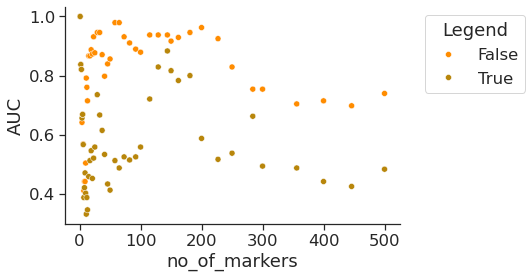

In [347]:

        df_plot = df[df['marker_list']==marker_list]
        df_plot = df_plot[df_plot['resolution']==resolution]
        df_plot = df_plot[df_plot['species']==species]
        #df_plot = df_plot[df_plot['no_of_markers']>=100]
        df_plot =  df_plot[df_plot['shuf'] == False]
        df_plot =  df_plot[df_plot['input_mean'] == input_mean]
        #df_plot =  df_plot[df_plot['index'] == 'NN']
        
        df_plot =  df_plot[df_plot['process_type'] == process_type]
        #df_plot =  df_plot[df_plot['drop_duplicates'] == drop_duplicates]
        
        subclass_color_dict = {
        True : 'darkgoldenrod',
        False : 'darkorange',
        'N': '#1f77b4',  # Blue
        'NN': '#2ca02c',  # Orange
        'heart': 'red',  # Green
        'blood': 'red', 
        'brain': '#1f77b4', # Green
}

        #df_plot =  df_plot[df_plot['dist'] == 0]
        df_plot = df_plot.fillna(0.5)

        #df_plot['no_of_markers_log'] = [np.log(x) for x in  df_plot['no_of_markers']]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        df_means = df_plot.groupby(['no_of_markers', 'shuf', 'resolution', 'drop_duplicates']).mean().reset_index()

        sns.scatterplot(data=df_means, x='no_of_markers', y='AUC', hue='drop_duplicates', palette=subclass_color_dict)
        #sns.boxplot(data=df_plot, x='shuf', y='AUC' )
        #plt.xscale('log')
        
        #sns.lineplot(data=df_plot.reset_index(), x=np.log(df_plot.reset_index()['no_of_markers']), y='AUC', hue='resolution')
        #plt.xlabel(column)
        plt.ylabel('AUC')
        #plt.xticks(df_plot.reset_index()['no_of_markers'][::200], labels=[str(x) for x in df_plot.reset_index()['no_of_markers'][::200]])
        plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
        #plt.tight_layout()
        plt.savefig(f'/home/lohia/{marker_list}_{species}_{process_type}_egad_plot.pdf', transparent=True, bbox_inches='tight')
        #plt.show()
        
        plt.show()
        

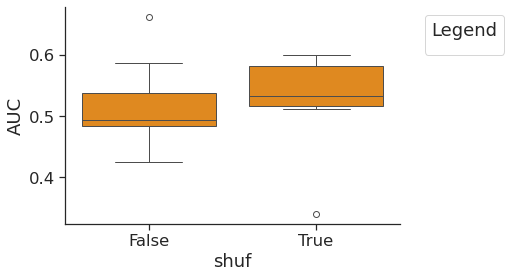

In [348]:

        df_plot = df[df['marker_list']==marker_list]
        df_plot = df_plot[df_plot['resolution']==resolution]
        df_plot = df_plot[df_plot['species']==species]
        df_plot = df_plot[df_plot['no_of_markers']>=200]
        #df_plot =  df_plot[df_plot['shuf'] == False]
        df_plot =  df_plot[df_plot['input_mean'] == input_mean]
        #df_plot =  df_plot[df_plot['index'] == 'NN']
        
        df_plot =  df_plot[df_plot['process_type'] == process_type]
        df_plot =  df_plot[df_plot['drop_duplicates'] == drop_duplicates]
        
        subclass_color_dict = {
        'N': '#1f77b4',  # Blue
        'NN': '#2ca02c',  # Orange
        'heart': 'red',  # Green
        'blood': 'red', 
        'brain': '#1f77b4', # Green
        'True' : 'grey',
        'False' : 'cyan'
        # Add more subclasses and their corresponding colors here
        }

        #df_plot =  df_plot[df_plot['dist'] == 0]
        df_plot = df_plot.fillna(0.5)

        #df_plot['no_of_markers_log'] = [np.log(x) for x in  df_plot['no_of_markers']]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        df_means = df_plot.groupby(['no_of_markers', 'shuf', 'resolution', 'drop_duplicates']).mean().reset_index()

        #sns.scatterplot(data=df_means, x='no_of_markers', y='AUC', hue='drop_duplicates')
        sns.boxplot(data=df_means, x='shuf', y='AUC', color='darkorange')
        #plt.xscale('log')
        
        #sns.lineplot(data=df_plot.reset_index(), x=np.log(df_plot.reset_index()['no_of_markers']), y='AUC', hue='resolution')
        #plt.xlabel(column)
        plt.ylabel('AUC')
        #plt.xticks(df_plot.reset_index()['no_of_markers'][::200], labels=[str(x) for x in df_plot.reset_index()['no_of_markers'][::200]])
        plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.savefig(f'/home/lohia/{marker_list}_{species}_{process_type}_egad_shuf.pdf', transparent=True, bbox_inches='tight')
        #plt.show()
        plt.show()
        

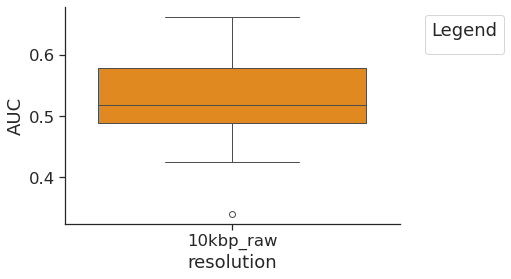

In [349]:

        df_plot = df[df['marker_list']==marker_list]
        #df_plot = df_plot[df_plot['resolution']==resolution]
        df_plot = df_plot[df_plot['species']==species]
        df_plot = df_plot[df_plot['no_of_markers']>=200]
        #df_plot =  df_plot[df_plot['shuf'] == False]
        df_plot =  df_plot[df_plot['input_mean'] == input_mean]
        #df_plot =  df_plot[df_plot['index'] == 'NN']
        
        df_plot =  df_plot[df_plot['process_type'] == process_type]
        df_plot =  df_plot[df_plot['drop_duplicates'] == drop_duplicates]
        
        subclass_color_dict = {
        'N': '#1f77b4',  # Blue
        'NN': '#2ca02c',  # Orange
        'heart': 'red',  # Green
        'blood': 'red', 
        'brain': '#1f77b4', # Green
        'True' : 'grey',
        'False' : 'cyan'
        # Add more subclasses and their corresponding colors here
        }

        #df_plot =  df_plot[df_plot['dist'] == 0]
        df_plot = df_plot.fillna(0.5)

        #df_plot['no_of_markers_log'] = [np.log(x) for x in  df_plot['no_of_markers']]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        df_means = df_plot.groupby(['no_of_markers', 'shuf', 'resolution', 'drop_duplicates']).mean().reset_index()

        #sns.scatterplot(data=df_means, x='no_of_markers', y='AUC', hue='drop_duplicates')
        sns.boxplot(data=df_means, x='resolution', y='AUC', color='darkorange')
        #plt.xscale('log')
        
        #sns.lineplot(data=df_plot.reset_index(), x=np.log(df_plot.reset_index()['no_of_markers']), y='AUC', hue='resolution')
        #plt.xlabel(column)
        plt.ylabel('AUC')
        #plt.xticks(df_plot.reset_index()['no_of_markers'][::200], labels=[str(x) for x in df_plot.reset_index()['no_of_markers'][::200]])
        plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
        #plt.tight_layout()
        plt.savefig(f'/home/lohia/{marker_list}_{species}_{process_type}_egad_resolution.pdf', transparent=True, bbox_inches='tight')
        #plt.show()
        plt.show()
        

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


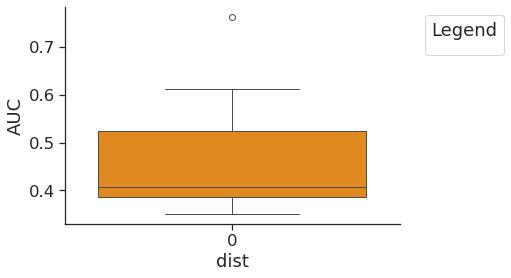

In [236]:

        df_plot = df[df['marker_list']==marker_list]
        df_plot = df_plot[df_plot['resolution']==resolution]
        df_plot = df_plot[df_plot['species']==species]
        df_plot = df_plot[df_plot['no_of_markers']>=200]
        #df_plot =  df_plot[df_plot['shuf'] == False]
        df_plot =  df_plot[df_plot['input_mean'] == input_mean]
        #df_plot =  df_plot[df_plot['index'] == 'NN']
        
        df_plot =  df_plot[df_plot['process_type'] == process_type]
        df_plot =  df_plot[df_plot['drop_duplicates'] == drop_duplicates]
        
        subclass_color_dict = {
        'N': '#1f77b4',  # Blue
        'NN': '#2ca02c',  # Orange
        'heart': 'red',  # Green
        'blood': 'red', 
        'brain': '#1f77b4', # Green
        'True' : 'grey',
        'False' : 'cyan'
        # Add more subclasses and their corresponding colors here
        }

        #df_plot =  df_plot[df_plot['dist'] == 0]
        df_plot = df_plot.fillna(0.5)

        #df_plot['no_of_markers_log'] = [np.log(x) for x in  df_plot['no_of_markers']]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        df_means = df_plot.groupby(['no_of_markers', 'shuf', 'resolution', 'drop_duplicates']).mean().reset_index()

        #sns.scatterplot(data=df_means, x='no_of_markers', y='AUC', hue='drop_duplicates')
        sns.boxplot(data=df_means, x='dist', y='AUC', color='darkorange')
        #plt.xscale('log')
        
        #sns.lineplot(data=df_plot.reset_index(), x=np.log(df_plot.reset_index()['no_of_markers']), y='AUC', hue='resolution')
        #plt.xlabel(column)
        plt.ylabel('AUC')
        #plt.xticks(df_plot.reset_index()['no_of_markers'][::200], labels=[str(x) for x in df_plot.reset_index()['no_of_markers'][::200]])
        plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f'/home/lohia/{marker_list}_{species}_{process_type}_egad_dist.pdf')
        #plt.show()
        plt.show()
        

In [407]:
func='atac'
df = pd.concat(df_list_atac)

In [423]:

marker_list = 'brain_class'
drop_duplicates=False
input_mean='mean_pearson'
species='mouse'
process_type='inter'
resolution='10kbp_raw'


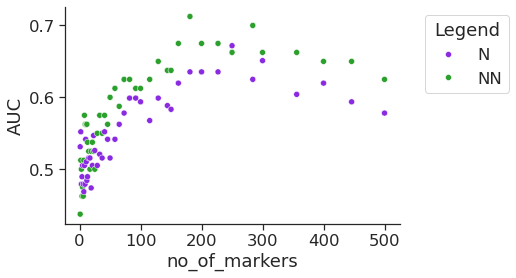

In [424]:

        df_plot = df[df['marker_list']==marker_list]
        df_plot = df_plot[df_plot['resolution']==resolution]
        df_plot = df_plot[df_plot['species']==species]
        #df_plot = df_plot[df_plot['no_of_markers']>=200]
        df_plot =  df_plot[df_plot['shuf'] == False]
        df_plot =  df_plot[df_plot['dist'] == 0]
        df_plot =  df_plot[df_plot['input_mean'] == input_mean]
        df_plot['subclass'] = [class2_dict[x] for x in df_plot.cell_type.tolist()]
        #df_plot =  df_plot[df_plot['index'] == 'NN']
        
        df_plot =  df_plot[df_plot['process_type'] == process_type]
        df_plot =  df_plot[df_plot['drop_duplicates'] == drop_duplicates]
        df_plot['resolution'] =  [int(x.split('_')[0][0:-3]) for x in df_plot.resolution.tolist()]
        
        subclass_color_dict = {
        'N': 'blueviolet',  # Blue
        'NN': '#2ca02c',  # Orange
        'heart': 'red',  # Green
        'blood': 'red', 
        'brain': '#1f77b4', # Green
        'True' : 'grey',
        'False' : 'cyan'
        # Add more subclasses and their corresponding colors here
        }

        #df_plot =  df_plot[df_plot['dist'] == 0]
        df_plot = df_plot.fillna(0.5)

        #df_plot['no_of_markers_log'] = [np.log(x) for x in  df_plot['no_of_markers']]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        
        if process_type=='inter':
            df_means = df_plot.groupby(['no_of_markers', 'shuf', 'resolution', 'dist', 'subclass']).mean().reset_index()
            sns.scatterplot(data=df_means, x='no_of_markers', y='AUC' ,palette=subclass_color_dict,hue='subclass')
            plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            df_means = df_plot.groupby(['no_of_markers', 'shuf', 'resolution', 'dist']).mean().reset_index()
            sns.scatterplot(data=df_means, x='no_of_markers', y='AUC' , color='darkorange')

        #sns.scatterplot(data=df_means, x='no_of_markers', y='AUC')
        
        #sns.boxplot(data=df_means, x='shuf', y='AUC',palette=subclass_color_dict,hue='subclass' )
        #sns.boxplot(data=df_means, x='shuf', y='AUC',color='#1f77b4')
        #plt.xscale('log')
        
        #sns.lineplot(data=df_plot.reset_index(), x=np.log(df_plot.reset_index()['no_of_markers']), y='AUC', hue='resolution')
        #plt.xlabel(column)
        plt.ylabel('AUC')
        #plt.tight_layout()
        #plt.xticks(df_plot.reset_index()['no_of_markers'][::200], labels=[str(x) for x in df_plot.reset_index()['no_of_markers'][::200]])
        
        plt.savefig(f'/home/lohia/{marker_list}_{species}_{process_type}_{func}_plot.pdf', transparent=True, bbox_inches='tight')
        plt.show()
        

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


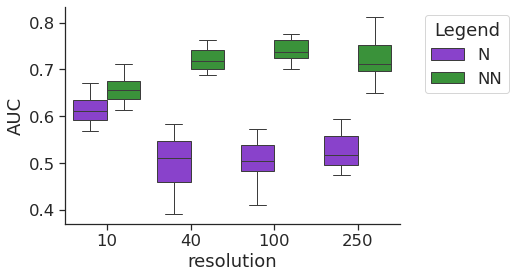

In [425]:

        df_plot = df[df['marker_list']==marker_list]
        #df_plot = df_plot[df_plot['resolution']=='1kbp_raw']
        df_plot = df_plot[df_plot['species']==species]
        df_plot = df_plot[df_plot['no_of_markers']>=100]
        df_plot =  df_plot[df_plot['shuf'] == False]
        df_plot =  df_plot[df_plot['dist'] == 0]
        df_plot =  df_plot[df_plot['input_mean'] == input_mean]
        df_plot['subclass'] = [class2_dict[x] for x in df_plot.cell_type.tolist()]
        #df_plot =  df_plot[df_plot['index'] == 'NN']
        
        df_plot =  df_plot[df_plot['process_type'] == process_type]
        df_plot =  df_plot[df_plot['drop_duplicates'] == drop_duplicates]
        df_plot['resolution'] =  [int(x.split('_')[0][0:-3]) for x in df_plot.resolution.tolist()]
        
        subclass_color_dict = {
        'N': 'blueviolet',  # Blue
        'NN': '#2ca02c',  # Orange
        'heart': 'red',  # Green
        'blood': 'red', 
        'brain': '#1f77b4', # Green
        'True' : 'grey',
        'False' : 'cyan'
        # Add more subclasses and their corresponding colors here
        }

        #df_plot =  df_plot[df_plot['dist'] == 0]
        df_plot = df_plot.fillna(0.5)

        #df_plot['no_of_markers_log'] = [np.log(x) for x in  df_plot['no_of_markers']]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        if process_type=='inter':
            df_means = df_plot.groupby(['no_of_markers', 'shuf', 'resolution', 'dist', 'subclass']).mean().reset_index()
            sns.boxplot(data=df_means, x='resolution', y='AUC' ,palette=subclass_color_dict,hue='subclass')
            plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            df_means = df_plot.groupby(['no_of_markers', 'shuf', 'resolution', 'dist']).mean().reset_index()
            sns.boxplot(data=df_means, x='resolution', y='AUC' , color='darkorange')
        #sns.scatterplot(data=df_means, x='no_of_markers', y='AUC')
        #sns.scatterplot(data=df_means, x='no_of_markers', y='AUC' , color='darkorange')
        #sns.boxplot(data=df_means, x='shuf', y='AUC',palette=subclass_color_dict,hue='subclass' )
        #sns.boxplot(data=df_means, x='resolution', y='AUC',color='darkorange', hue='subclass' )
        #plt.xscale('log')
        
        #sns.lineplot(data=df_plot.reset_index(), x=np.log(df_plot.reset_index()['no_of_markers']), y='AUC', hue='resolution')
        #plt.xlabel(column)
        plt.ylabel('AUC')
        #plt.tight_layout()
        #plt.xticks(df_plot.reset_index()['no_of_markers'][::200], labels=[str(x) for x in df_plot.reset_index()['no_of_markers'][::200]])
        #plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.savefig(f'/home/lohia/{marker_list}_{species}_{process_type}_{func}_plot_resolution.pdf', transparent=True, bbox_inches='tight')
        plt.show()
        

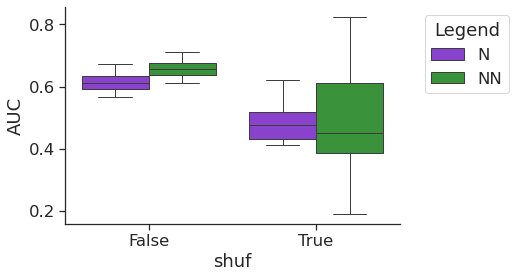

In [426]:

        df_plot = df[df['marker_list']==marker_list]
        df_plot = df_plot[df_plot['resolution']==resolution]
        df_plot = df_plot[df_plot['species']==species]
        df_plot = df_plot[df_plot['no_of_markers']>=100]
        #df_plot =  df_plot[df_plot['shuf'] == False]
        df_plot =  df_plot[df_plot['dist'] == 0]
        df_plot =  df_plot[df_plot['input_mean'] == input_mean]
        df_plot['subclass'] = [class2_dict[x] for x in df_plot.cell_type.tolist()]
        #df_plot =  df_plot[df_plot['index'] == 'NN']
        
        df_plot =  df_plot[df_plot['process_type'] == process_type]
        df_plot =  df_plot[df_plot['drop_duplicates'] == drop_duplicates]
        df_plot['resolution'] =  [int(x.split('_')[0][0:-3]) for x in df_plot.resolution.tolist()]
        
        subclass_color_dict = {
        'N': 'blueviolet',  # Blue
        'NN': '#2ca02c',  # Orange
        'heart': 'red',  # Green
        'blood': 'red', 
        'brain': '#1f77b4', # Green
        'True' : 'grey',
        'False' : 'cyan'
        # Add more subclasses and their corresponding colors here
        }

        #df_plot =  df_plot[df_plot['dist'] == 0]
        df_plot = df_plot.fillna(0.5)

        #df_plot['no_of_markers_log'] = [np.log(x) for x in  df_plot['no_of_markers']]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        if process_type=='inter':
            df_means = df_plot.groupby(['no_of_markers', 'shuf', 'resolution', 'dist', 'subclass']).mean().reset_index()
            sns.boxplot(data=df_means, x='shuf', y='AUC' ,palette=subclass_color_dict,hue='subclass')
            plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            df_means = df_plot.groupby(['no_of_markers', 'shuf', 'resolution', 'dist']).mean().reset_index()
            sns.boxplot(data=df_means, x='shuf', y='AUC' , color='darkorange')

        #sns.scatterplot(data=df_means, x='no_of_markers', y='AUC')
        #sns.scatterplot(data=df_means, x='no_of_markers', y='AUC' , color='darkorange')
        #sns.boxplot(data=df_means, x='shuf', y='AUC',palette=subclass_color_dict,hue='subclass' )
        #sns.boxplot(data=df_means, x='shuf', y='AUC',color='darkorange')
        #plt.xscale('log')
        
        #sns.lineplot(data=df_plot.reset_index(), x=np.log(df_plot.reset_index()['no_of_markers']), y='AUC', hue='resolution')
        #plt.xlabel(column)
        plt.ylabel('AUC')
        #plt.tight_layout()
        #plt.xticks(df_plot.reset_index()['no_of_markers'][::200], labels=[str(x) for x in df_plot.reset_index()['no_of_markers'][::200]])
        #plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.savefig(f'/home/lohia/{marker_list}_{species}_{process_type}_{func}_plot_shuf.pdf', transparent=True, bbox_inches='tight')
        plt.show()
        

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


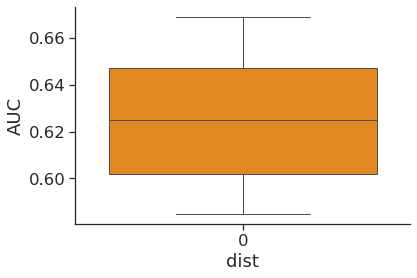

In [427]:

        df_plot = df[df['marker_list']==marker_list]
        df_plot = df_plot[df_plot['resolution']==resolution]
        df_plot = df_plot[df_plot['species']==species]
        df_plot = df_plot[df_plot['no_of_markers']>=100]
        df_plot =  df_plot[df_plot['shuf'] == False]
        #df_plot =  df_plot[df_plot['dist'] == 0]
        df_plot =  df_plot[df_plot['input_mean'] == input_mean]
        df_plot['subclass'] = [class2_dict[x] for x in df_plot.cell_type.tolist()]
        #df_plot =  df_plot[df_plot['index'] == 'NN']
        
        df_plot =  df_plot[df_plot['process_type'] == process_type]
        df_plot =  df_plot[df_plot['drop_duplicates'] == drop_duplicates]
        df_plot['resolution'] =  [int(x.split('_')[0][0:-3]) for x in df_plot.resolution.tolist()]
        
        subclass_color_dict = {
        'N': '#1f77b4',  # Blue
        'NN': '#2ca02c',  # Orange
        'heart': 'red',  # Green
        'blood': 'red', 
        'brain': '#1f77b4', # Green
        'True' : 'grey',
        'False' : 'cyan'
        # Add more subclasses and their corresponding colors here
        }

        #df_plot =  df_plot[df_plot['dist'] == 0]
        df_plot = df_plot.fillna(0.5)

        #df_plot['no_of_markers_log'] = [np.log(x) for x in  df_plot['no_of_markers']]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        #df_plot = df_plot[df_plot.index.isin(pair_groups)]
        df_means = df_plot.groupby(['no_of_markers', 'shuf', 'resolution', 'dist']).mean().reset_index()

        #sns.scatterplot(data=df_means, x='no_of_markers', y='AUC')
        #sns.scatterplot(data=df_means, x='no_of_markers', y='AUC' , color='darkorange')
        #sns.boxplot(data=df_means, x='shuf', y='AUC',palette=subclass_color_dict,hue='subclass' )
        sns.boxplot(data=df_means, x='dist', y='AUC',color='darkorange')
        #plt.xscale('log')
        
        #sns.lineplot(data=df_plot.reset_index(), x=np.log(df_plot.reset_index()['no_of_markers']), y='AUC', hue='resolution')
        #plt.xlabel(column)
        plt.ylabel('AUC')
        #plt.tight_layout()
        #plt.xticks(df_plot.reset_index()['no_of_markers'][::200], labels=[str(x) for x in df_plot.reset_index()['no_of_markers'][::200]])
        #plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.savefig(f'/home/lohia/{marker_list}_{species}_{process_type}_{func}_plot_dist.pdf', transparent=True, bbox_inches='tight')
        plt.show()
        